                                mean         std     min     max    Mode  \
Pregnancies                 3.845052    3.369578   0.000   17.00   1.000   
Glucose                   120.894531   31.972618   0.000  199.00  99.000   
BloodPressure              69.105469   19.355807   0.000  122.00  70.000   
SkinThickness              20.536458   15.952218   0.000   99.00   0.000   
Insulin                    79.799479  115.244002   0.000  846.00   0.000   
BMI                        31.992578    7.884160   0.000   67.10  32.000   
DiabetesPedigreeFunction    0.471876    0.331329   0.078    2.42   0.254   
Age                        33.240885   11.760232  21.000   81.00  22.000   

                            Median  
Pregnancies                 3.0000  
Glucose                   117.0000  
BloodPressure              72.0000  
SkinThickness              23.0000  
Insulin                    30.5000  
BMI                        32.0000  
DiabetesPedigreeFunction    0.3725  
Age                

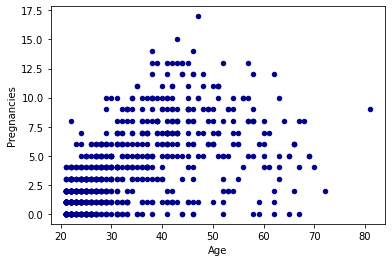

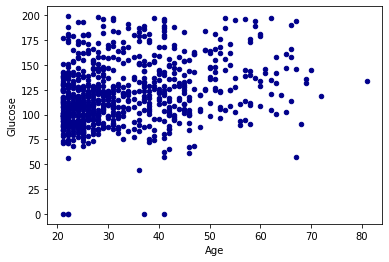

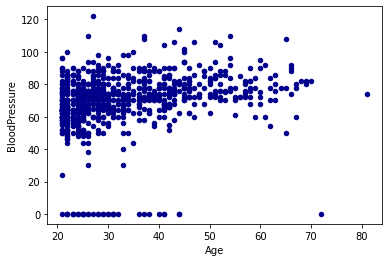

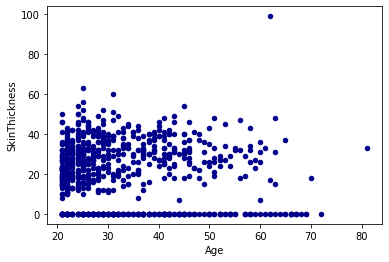

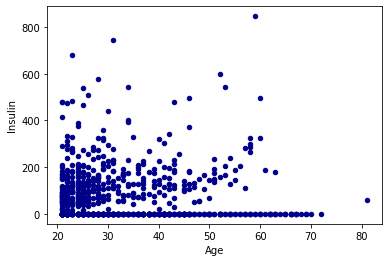

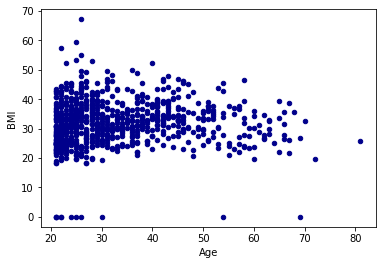

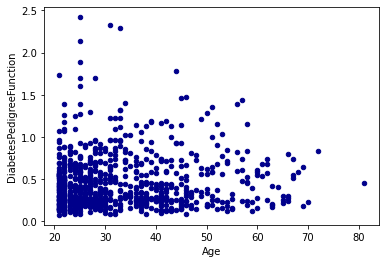

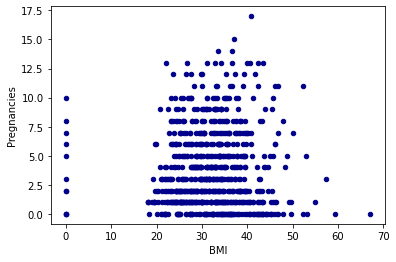

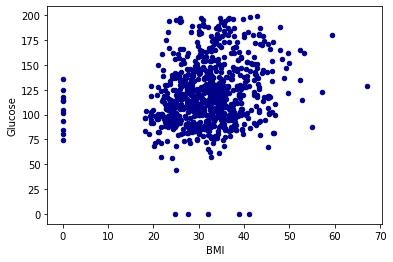

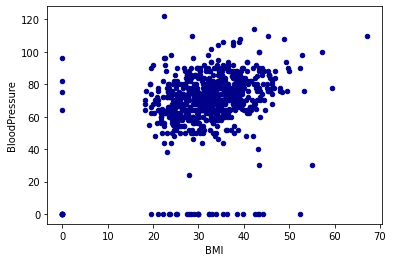

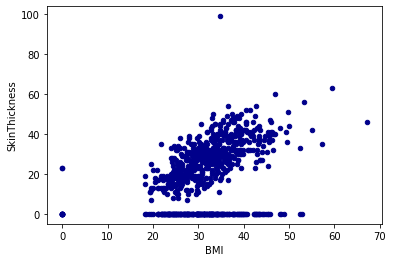

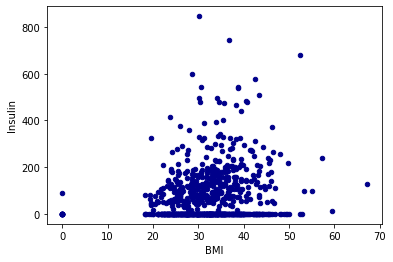

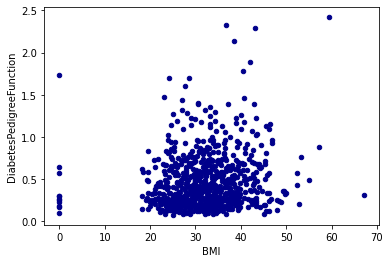

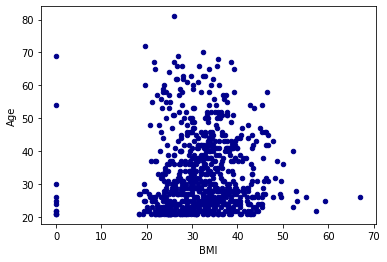

In [87]:
# @Author : Anirudh Sathish 
# RollNo : CS20B1125
""" 1. Mean, median, mode, minimum, maximum, and standard deviation for all the attributes excluding the attribute ‘Outcome’. 
Find the value of the correlation coefficient for ‘Age’ with all other attributes (excluding ‘Outcome’),
and ‘BMI’ with all other attributes (excluding ‘Outcome’)
.Then, obtain the scatter plot between 

            a. ‘Age’ and each of the other attributes, excluding ‘Outcome’ 

            b. ‘BMI’ and each of the other attributes, excluding ‘Outcome’ (You can use matplotlib library).

2. Plot the histogram for the attributes ‘Pregnancies’ and ‘SkinThickness’ (You may use “hist” function from pandas). 
Plot the histogram of attribute ‘Pregnancies’ and for each of the 2 Outcomes individually 
(Use “groupby” function to group the tuples according to their “Outcome”). 
Obtain the boxplot for all the attributes excluding ‘Outcome’ (Use “boxplot” function).

"""
            

# Defining the neccesary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
#Reading the file 
diabetes = pd.read_csv("diabetes1.csv")



# Creating a dataframe excluding outcome , so as to satisfy question requirment

#using iloc
diabetes_without_output = diabetes.iloc[:, [True,True,True,True,True,True,True,True,False]]
db = diabetes_without_output.describe()

# Extracting the mean , standard deviation , minimum and maximum 
db_insight = db.iloc[[False,True , True , True , False , False , False , True]]

#Extracting the mode and formatting it 
db_mode = diabetes_without_output.mode(numeric_only = True)
db_mode_r = db_mode.iloc[[True,False]]
db_mode_r.index=['Mode']

#Extracting the median and formatting it 
db_median = diabetes_without_output.median()
db_median = db_median.to_frame()
db_median = db_median.transpose()
db_median.index = ['Median']

# Finally concatenating and transposing for pleasant view 
db_insight = pd.concat([db_insight,db_mode_r,db_median])
db_insight_RowView = db_insight.transpose()
print(db_insight_RowView)
print("\n")

#----------------------------------------------------------------------------------------------------

#Finding the correlation
print("Correlation between Age and Every other value excpt Outcome")
db_corr = diabetes_without_output.corr(method = "pearson")
db_corr_age = db_corr[['Age']]
print(db_corr_age)
print("\n")

#---------------------------------------------------------------------------

#Finding the scatterplot 
#indentifying
column_headers = list(diabetes_without_output.columns.values)
column_headers_wt_age = column_headers[:-1]

c1 = column_headers[:-3]
c2 = column_headers[6:]
column_wt_BMI = c1+c2


#Printing the scatterplot of age with and ewvery other value excluding outcome 
for i in range(len(column_headers_wt_age)):
    ax1 = diabetes_without_output.plot.scatter(x='Age',y=column_headers_wt_age[i],c='DarkBlue')
    
#Printing the scatterplot of age with and ewvery other value excluding outcome 
for i in range(len(column_headers_wt_age)):
    ax1 = diabetes_without_output.plot.scatter(x='BMI',y=column_wt_BMI[i],c='DarkBlue')
    
#---------------------------------------------------------------------------------
# 2. ------------- Plot histogram ------------------------------






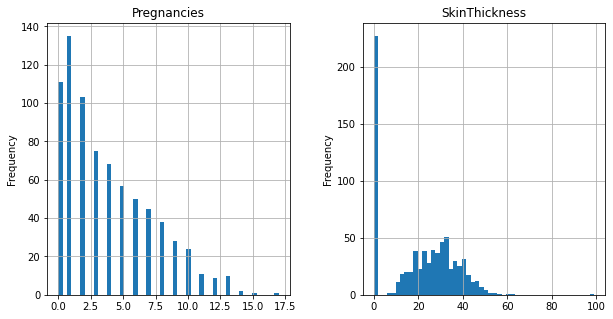

In [93]:
#Printing histogram of pregnancies and skin thickness 
col1 = column_headers[:4]
col2 = col1[:1]
col3 = col1[-1:]
col_hist_preg_skin = col2+col3
db_hist_preg_skin = diabetes_without_output.iloc[:,[True,False,False,True,False,False,False,False]]
plots = db_hist_preg_skin.hist(bins=50, figsize=(10,5))
for plot in plots.flatten():
    plot.set_ylabel("Frequency")
plt.show()

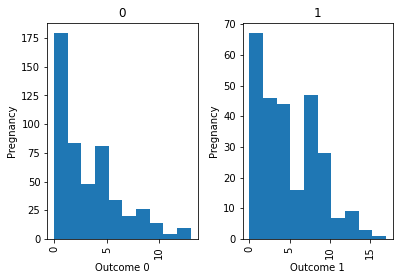

In [94]:

plot = diabetes.Pregnancies.hist(by=diabetes.Outcome )
count = 0 
for pl in plot.flatten():
    pl.set_xlabel("Pregnancy")
    pl.set_ylabel("Frequency")
    count+=1

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


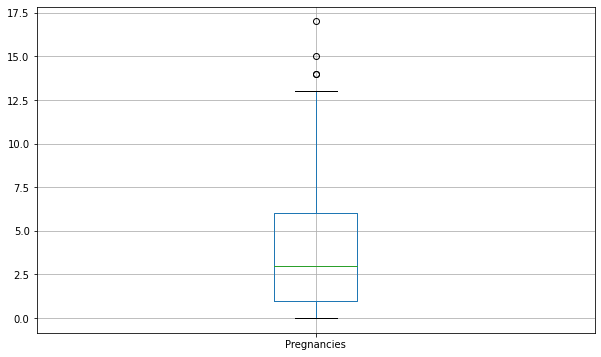

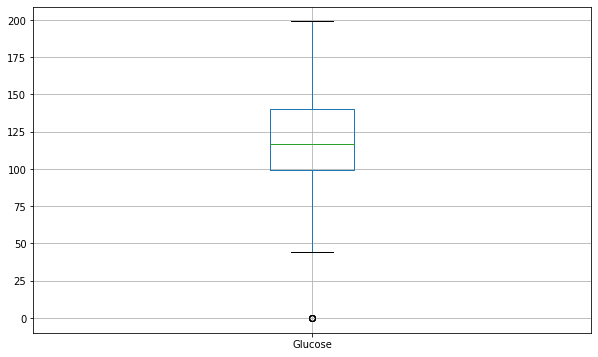

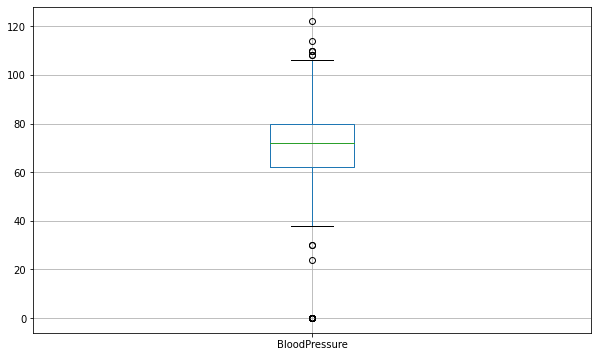

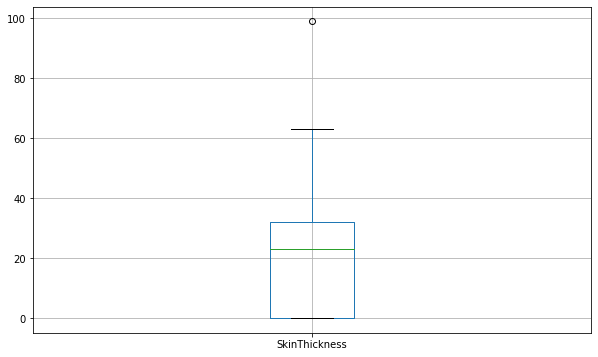

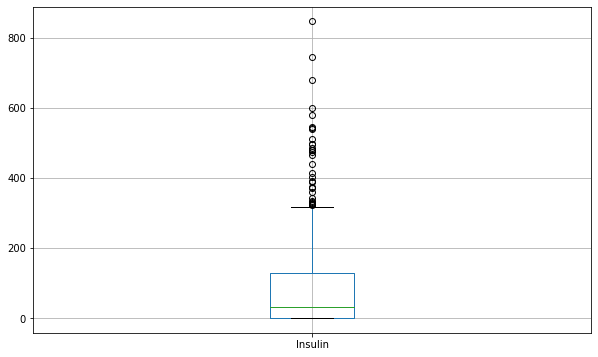

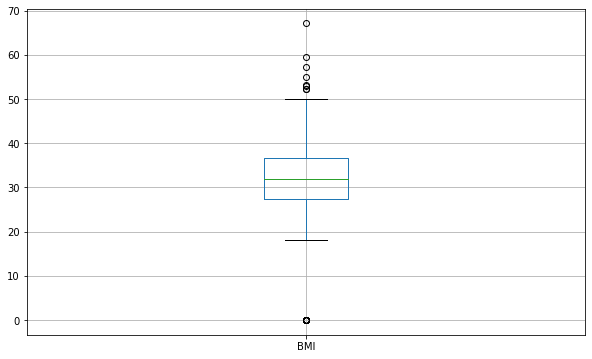

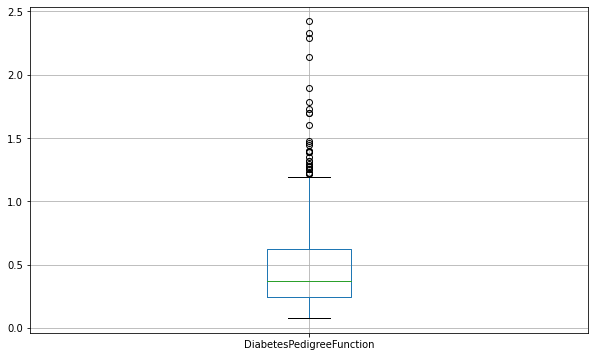

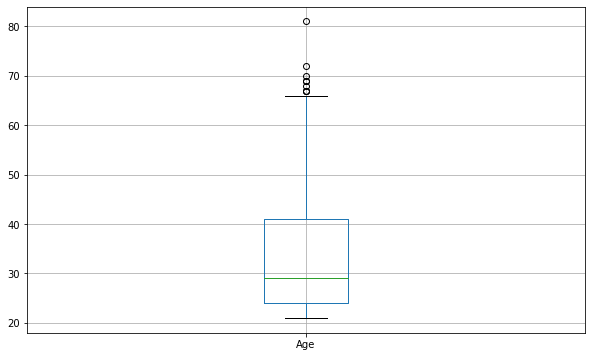

In [86]:
#-----------------------------------
print(column_headers)
for i in range(len(column_headers)):
    plt.figure(figsize=(10,6))
    diabetes_without_output.boxplot(column_headers[i])